In [1]:
import pandas as pd
import json
import numpy as np

In [2]:
kmer8 = pd.read_csv('kmer8.csv')

In [3]:
kmer8 = kmer8.reset_index()

In [4]:
kmer8.head()

,index,Unnamed: 0,target_gene,kmer8,common_keys,common_keys_size,size,max,num,mean,atleastTwo
0,0,0,ENSG00000000460,"[{'AGCCAGAG': 1, 'GCCAGAGA': 1, 'CCAGAGAG': 1,...",set(),0,68,"{'CCATTTGT': 14, 'TTGTGATA': 13, 'TCTTCCCT': 1...",14,2.903778,7667
1,1,1,ENSG00000000938,"[{'ACTGTCAG': 1, 'CTGTCAGT': 1, 'TGTCAGTG': 1,...",set(),0,39,"{'CCAGCCTG': 9, 'AGAGAGGG': 8, 'CCCAGCCC': 8, ...",9,1.344265,3567
2,2,2,ENSG00000000971,"[{'GATTGTAC': 1, 'ATTGTACA': 1, 'TTGTACAT': 1,...",set(),0,45,"{'TTTTTAAA': 10, 'AAAAAAAT': 9, 'AAATATTT': 8,...",10,1.370870,4128
3,3,3,ENSG00000001084,"[{'CAGAGCAT': 1, 'AGAGCATA': 1, 'GAGCATAA': 1,...",set(),0,60,"{'TTTTTTTT': 9, 'TTTTTTTC': 9, 'TTCTTCTT': 9, ...",9,1.750636,7673
4,4,4,ENSG00000001167,"[{'ATGCTTTA': 1, 'TGCTTTAT': 1, 'GCTTTATA': 1,...",set(),0,13,"{'GGCTTTGC': 3, 'GCAAGAGC': 3, 'CAAGAGCT': 3, ...",3,1.062254,309


In [ ]:
cols =

In [4]:
a = list(kmer8.iloc[0].kmer8)

In [5]:
a = eval(kmer8.iloc[0].kmer8)

In [6]:
def kmerCommon(dict1,dict2):
    my_dict = [dict1,dict2]

    common_keys = set.intersection(*map(set,my_dict))
    return len(common_keys)
    

In [7]:
reader=[]

In [8]:
def globalValue(df):
    
    sequences = eval(df['kmer8'])
    length = len(sequences)
    b = np.zeros(shape=(length,length))
    name  = str(df.target_gene)
    for i in range(0,length):
        for j in range(0,length):
            if(b[j][i] != 0):
                b[i][j] = b[j][i]
            else:
                b[i][j] = kmerCommon(sequences[i],sequences[j])
    reader.append(b)
    return b

In [9]:
for i in range(0,len(kmer8)):
    globalValue(kmer8.iloc[i])

In [10]:
reader

[array([[223.,   1.,   8., ...,   2.,   0.,   0.],
        [  1., 362.,  13., ...,   2.,  10.,  10.],
        [  8.,  13., 671., ...,   2.,  12.,  12.],
        ...,
        [  2.,   2.,   2., ..., 222.,   1.,   1.],
        [  0.,  10.,  12., ...,   1., 235., 235.],
        [  0.,  10.,  12., ...,   1., 235., 235.]]),
 array([[300.,   2.,   2., ...,   6.,   3.,   7.],
        [  2., 662.,  20., ...,   8.,   8.,   4.],
        [  2.,  20., 718., ...,   9.,   5.,   7.],
        ...,
        [  6.,   8.,   9., ..., 422.,   5.,   9.],
        [  3.,   8.,   5., ...,   5., 301.,   3.],
        [  7.,   4.,   7., ...,   9.,   3., 429.]]),
 array([[555.,   6.,   6., ...,   3.,   3.,   6.],
        [  6., 372.,   0., ...,   3.,   1.,   4.],
        [  6.,   0., 351., ...,   0.,   3.,   0.],
        ...,
        [  3.,   3.,   0., ..., 247.,   0.,   1.],
        [  3.,   1.,   3., ...,   0., 271.,   0.],
        [  6.,   4.,   0., ...,   1.,   0., 223.]]),
 array([[541.,   4.,  13., ...,   2.,

In [11]:
np.save('my_dict_kmer8.npy',  reader, allow_pickle=True) 

/storage/bin/anaconda3/envs/yudeepenv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [12]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [24]:
clusters = hierarchy.linkage(reader[123], method="complete")
labelList = range(0, len(reader[123]))

In [22]:
def plot_dendrogram(clusters):
    plt.figure(figsize=(20,6))
    dendrogram = hierarchy.dendrogram(clusters, labels=labelList, orientation="top")
    plt.ylabel('Distance');

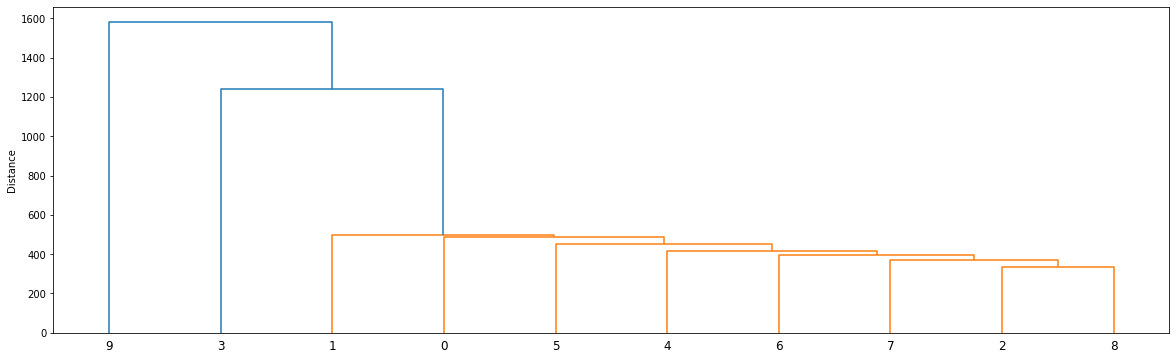

In [25]:
plot_dendrogram(clusters)